In [1]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#opening and transfering data into an array
ds = xr.open_dataset("/home/mlopez/EXEC/Processed Data Varibales/NorESM1-M_rcp85_tg_mean_annual.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 416, time: 151)
Coordinates:
  * time     (time) object 1950-01-01 00:00:00 ... 2100-01-01 00:00:00
  * lon      (lon) float32 -89.04521 -88.96188 -88.87855 ... -54.54659 -54.46326
  * lat      (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
Data variables:
    tg_mean  (time, lat, lon) float32 ...
Attributes:
    Conventions:     CF-1.5
    title:           NorESM1-M model output prepared for CMIP5 historical
    history:         2011-06-01T01:20:15Z CMOR rewrote data to comply with CF...
    institution:     Norwegian Climate Centre
    source:          NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-noresm-v...
    redistribution:  Redistribution prohibited. For internal use only.

In [4]:
df = ds.to_dataframe().dropna()

In [5]:
df

tg_mean
lat       lon        time                           
66.623306 -89.045212 1950-01-01 00:00:00  260.487122
                     1951-01-01 00:00:00  259.087128
                     1952-01-01 00:00:00  258.688416
                     1953-01-01 00:00:00  257.983765
                     1954-01-01 00:00:00  259.069092
...                                              ...
40.041039 -74.045807 2096-01-01 00:00:00  289.984100
                     2097-01-01 00:00:00  290.481293
                     2098-01-01 00:00:00  290.068420
                     2099-01-01 00:00:00  290.675110
                     2100-01-01 00:00:00  290.421906

[11507106 rows x 1 columns]

In [6]:
df["tg_mean"].isna().mean()

0.0

In [7]:
TSdf = df.groupby("time").mean()
TSdf.head()

,tg_mean
time,
1950-01-01 00:00:00,273.467590
1951-01-01 00:00:00,271.929443
1952-01-01 00:00:00,271.688660
1953-01-01 00:00:00,271.315033
1954-01-01 00:00:00,271.918701


In [43]:
#Adding column of temperature in Celsius
TSMeanC = TSdf
TSMeanC["tg_mean"] = TSMeanC["tg_mean"] -273.15
TSMeanC.head()

,tg_mean
time,
1950-01-01 00:00:00,0.317596
1951-01-01 00:00:00,-1.220551
1952-01-01 00:00:00,-1.461334
1953-01-01 00:00:00,-1.834961
1954-01-01 00:00:00,-1.231293


Text(0.5, 1.0, 'Temperature Moyenne')

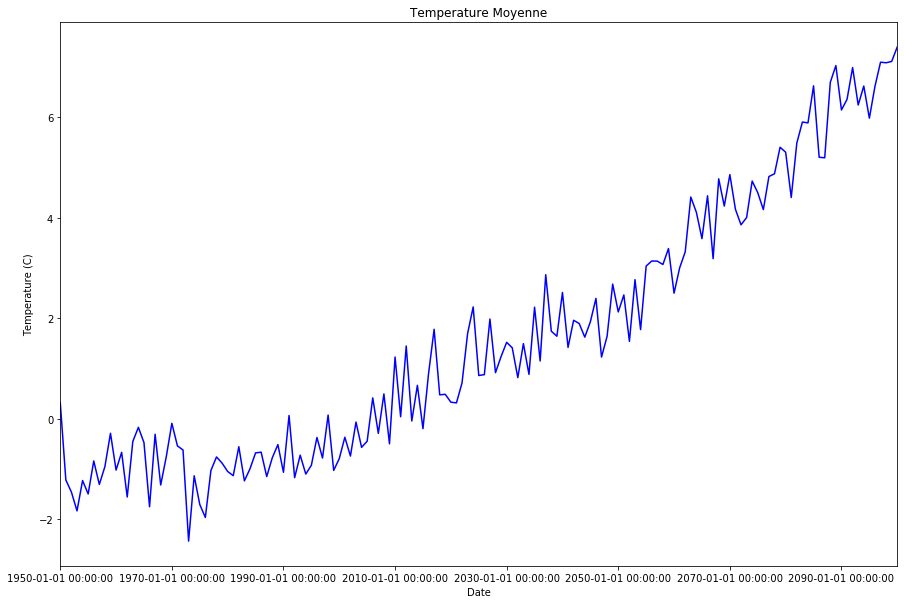

In [46]:
# plot time series
TSMeanC['tg_mean'].plot.line('o-',color='blue',figsize=(15,10))

# add colour reference
#blue_patch = mpatches.Patch(color='blue', label='Temperature Moyenne')
#plt.legend(handles=[blue_patch,])

# add titles
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Moyenne')